In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.externals.six import StringIO  
import pydot 
from sklearn.metrics import accuracy_score
import seaborn as sns

In [161]:
iris = load_iris()

In [283]:
for line in iris.DESCR.split("\n"):
    print line

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [165]:
irispd.columns

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)', u'target', u'species'],
      dtype='object')

In [203]:
irisTrain = irispd.sample(frac=.65)
irisTest = irispd.drop(irisTrain.index)

irisTrainY = irisTrain['species']


In [277]:
DT = DecisionTreeClassifier(min_samples_leaf=10,random_state=15)

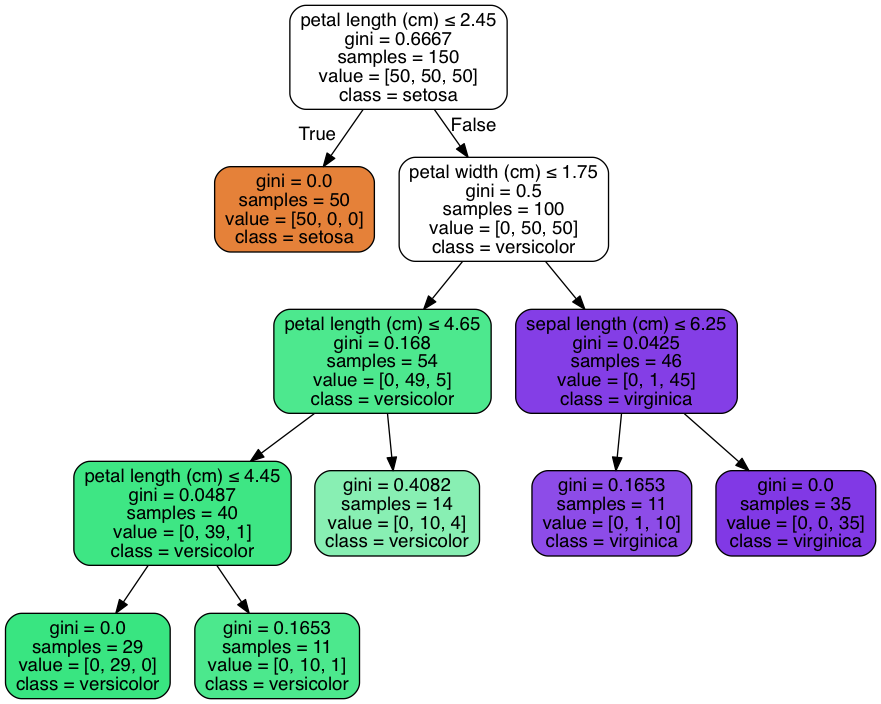

In [278]:
from IPython.display import Image  
dot_data = StringIO()
DT.fit(iris.data,iris.target)
export_graphviz(DT, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue()
                                 )  
Image(graph.create_png())  


In [279]:
RFC = RandomForestClassifier(n_estimators=50, min_samples_leaf=10,random_state=15)

In [280]:
RFC.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [281]:
print "{0:0.2f} Decision Tree Accuracy".format(accuracy_score(DT.predict(iris.data), iris.target))

0.96 Decision Tree Accuracy


In [282]:
print "{0:0.2f} Random Forests Accuracy".format(accuracy_score(RFC.predict(iris.data), iris.target))

0.97 Random Forests Accuracy


In [118]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.regression import r2_score

In [105]:
boston = load_boston()

In [160]:
for l in boston.DESCR.split("\n"):
    print l

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [127]:
bostonpd = pd.DataFrame(boston.data,columns=[boston.feature_names])

In [128]:
bostonpd = bostonpd.join(pd.DataFrame(boston.target,columns=['Price']))

In [134]:
bostonTrain= bostonpd.sample(frac=.65)
bostonTrainY = bostonTrain["Price"]
bostonTest = bostonpd.drop(bostonTrain.index)
bostonTestY = bostonTest["Price"]

bostonTrain = bostonTrain[boston.feature_names]
bostonTest = bostonTest[boston.feature_names]

In [269]:
DTR = DecisionTreeRegressor(min_samples_leaf=10,random_state=15)

In [270]:
DTR.fit(bostonTrain,bostonTrainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=15,
           splitter='best')

In [271]:
r2_score(DTR.predict(bostonTest), bostonTestY)

0.36064780567428467

In [272]:
RFR =RandomForestRegressor(min_samples_leaf=10,n_estimators=100,random_state=15)

In [267]:
RFR.fit(bostonTrain,bostonTrainY)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=15,
           verbose=0, warm_start=False)

In [268]:
r2_score(RFR.predict(bostonTest), bostonTestY)

0.61755057522710999

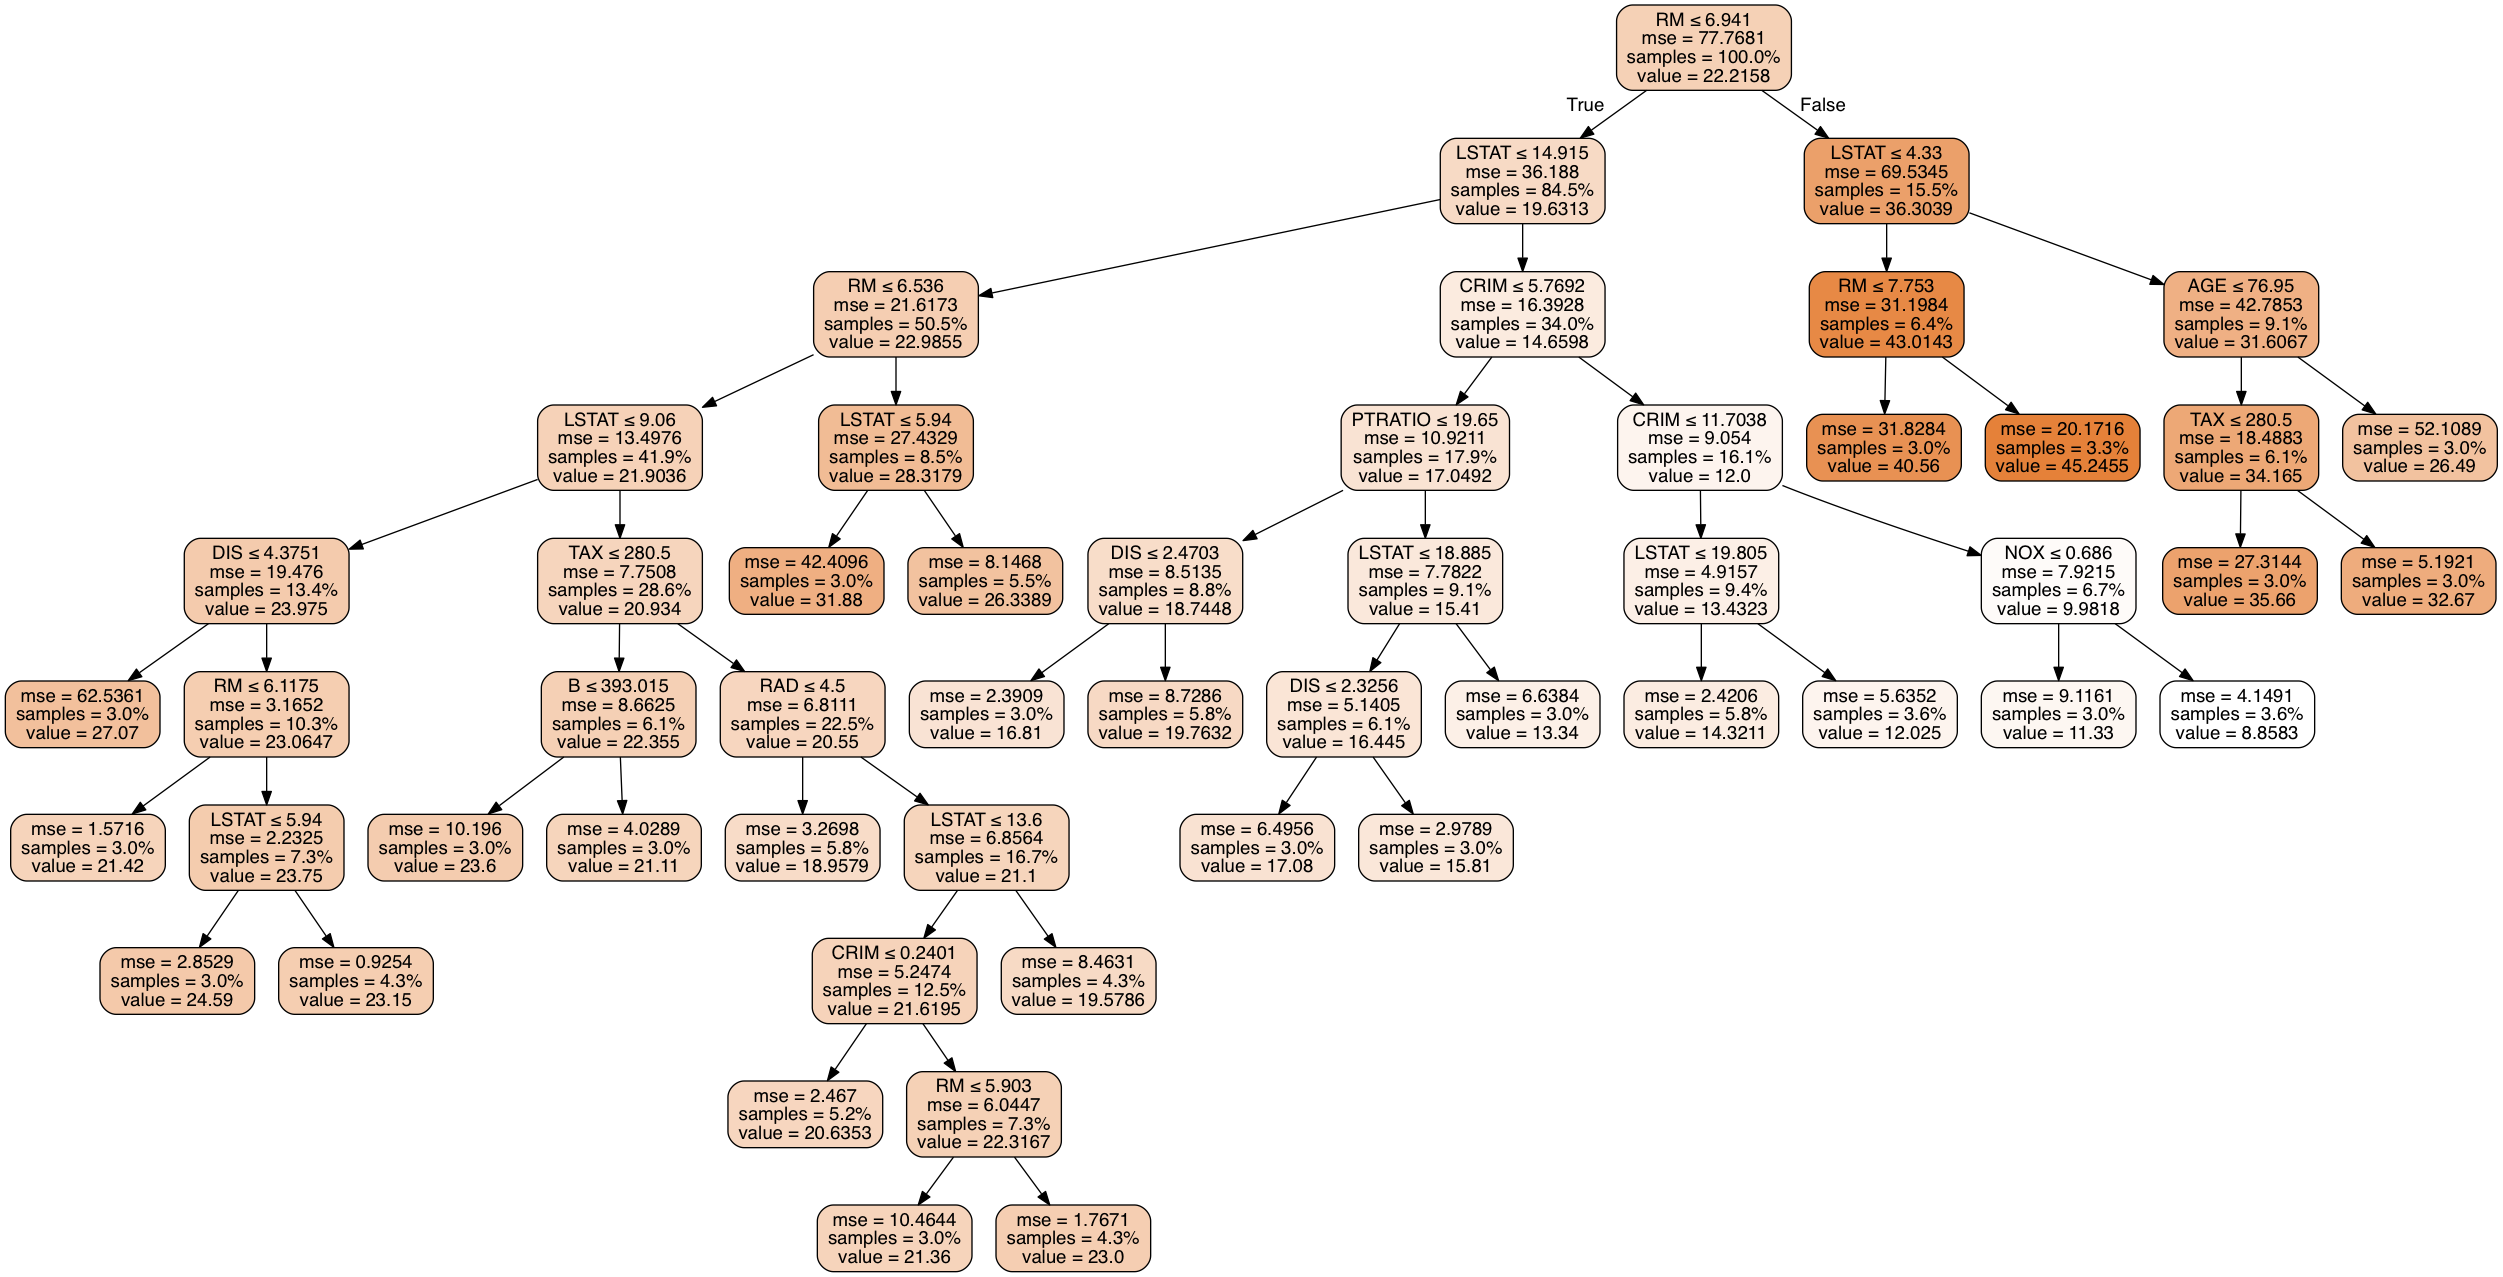

In [157]:
export_graphviz(DTR, out_file=dot_data,  
                         feature_names=boston.feature_names,
                         class_names = None,
                         proportion= True,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph2 = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph2[2].create_png())  
